<a href="https://colab.research.google.com/github/jannat0718/Face-Mask-Detection/blob/main/Facemask_detection_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Libraries 

In [ ]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
#import glob
#import os
import cv2
from google.colab.patches import cv2_imshow



##Directory Setup

In [ ]:
Working_dir='/content/drive/MyDrive/Colab Notebooks/Mask detection/'
Data_directory='/content/drive/MyDrive/Kaggle_dataset/Mask_dataset/Face Mask Detection Dataset.zip'## dataset uploaded here

##Unzip dataset

In [ ]:
from zipfile import ZipFile
file=Data_directory
with ZipFile(file,'r') as zip:
  zip.printdir()
  print('processing...........')
  zip.extractall(Working_dir)
  print("Process completed!")

File Name                                             Modified             Size
Face Mask Detection Dataset/                   2021-08-31 22:26:08            0
Face Mask Detection Dataset/dataset/           2020-07-09 20:42:14            0
Face Mask Detection Dataset/dataset/without_mask/ 2020-07-09 20:42:14            0
Face Mask Detection Dataset/dataset/without_mask/0.jpg 2020-07-09 20:42:14        21764
Face Mask Detection Dataset/dataset/without_mask/0_0_aidai_0014.jpg 2020-07-09 20:42:14         6318
Face Mask Detection Dataset/dataset/without_mask/0_0_aidai_0029.jpg 2020-07-09 20:42:14         7615
Face Mask Detection Dataset/dataset/without_mask/0_0_aidai_0043.jpg 2020-07-09 20:42:14         8266
Face Mask Detection Dataset/dataset/without_mask/0_0_aidai_0074.jpg 2020-07-09 20:42:14         5868
Face Mask Detection Dataset/dataset/without_mask/0_0_aidai_0084.jpg 2020-07-09 20:42:14         6299
Face Mask Detection Dataset/dataset/without_mask/0_0_aidai_0136.jpg 2020-07-09 20:42

##Hyperparameter setting

In [ ]:
##Hyperparameter
Batch_size=64
learning_rate=1e-4
img_height=224
img_width=224
Num_epoch=10

##ImageDatafenerator & flow_from_directory

In [ ]:
# Data generator for Train Data
datagen = ImageDataGenerator(
    rescale=1/255,        # Rescale the pixel values to the range [0, 1]
    zoom_range=(0.95,0.95),  # Apply random zoom with a range of 5%
    rotation_range=20,    # Apply random rotations with a range of 20 degrees
    width_shift_range=0.1, # Apply random horizontal shifts with a range of 10%
    height_shift_range=0.1,# Apply random vertical shifts with a range of 10%
    shear_range=0.1,      # Apply random shear with a range of 10%
    horizontal_flip=True, # Randomly flip images horizontally
    vertical_flip=False,  # Do not randomly flip images vertically
    data_format='channels_last',  # Use channel last ordering for the image arrays
    dtype='float32',      # Convert the image arrays to float32 data type
    validation_split=0.2  # Reserve 10% of the data for validation
)

In [ ]:
train_generator=datagen.flow_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/Mask detection/Face Mask Detection Dataset/dataset/',
  target_size=(img_height,img_width),
  batch_size=Batch_size,
  shuffle=True,
  class_mode='binary',
  subset='training',
  seed=123,
  #save_to_dir="/content/output",
  #save_format='png',
)

Found 3067 images belonging to 2 classes.


In [ ]:
validation_generator=datagen.flow_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/Mask detection/Face Mask Detection Dataset/dataset/',
  target_size=(img_height,img_width),
  batch_size=Batch_size,
  shuffle=True,
  class_mode='binary',
  subset='validation',
  seed=123,
)

Found 766 images belonging to 2 classes.


##Classes

In [ ]:
[a,b]=train_generator.class_indices
classess=[a,b] 
print(classess[0])
print(classess[1])

with_mask
without_mask


##Visualize

In [ ]:
#Original image & label plotting function
def plot_sample(X,y,index):
  X = X[index]
  Y=int(y[index])
  #print(Y)
  label_title=("Label :"+ classess[Y])
  plt.xlabel(label_title)                
  plt.imshow(X)

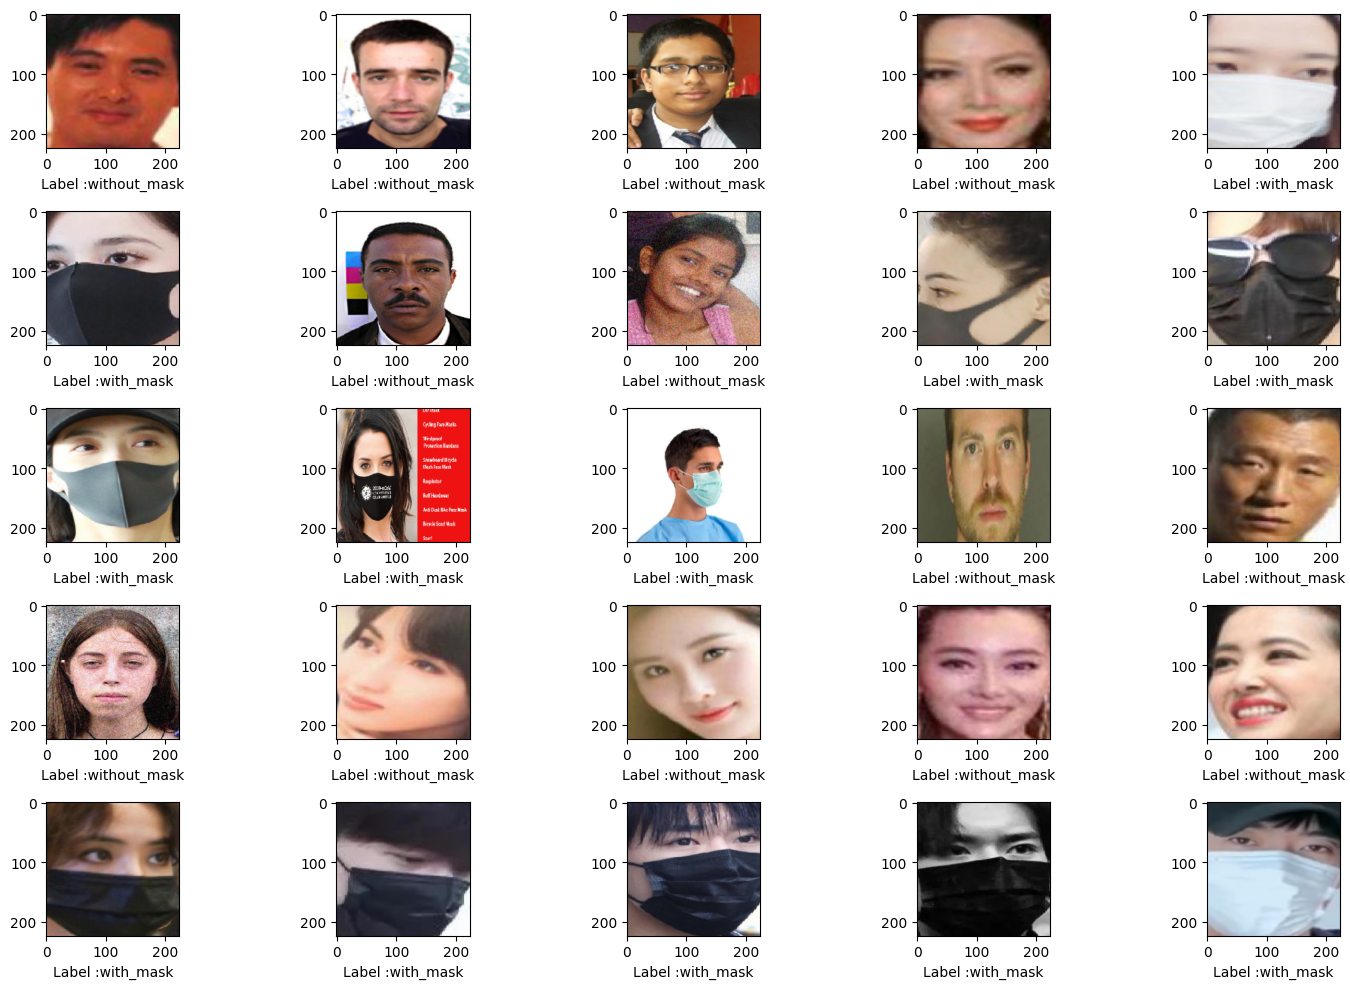

In [ ]:
#training figure
x_train,y_train=train_generator.next()

fig=plt.figure(figsize=(15,10)) 
axes=[] 
for index in range(25):
  axes.append( fig.add_subplot(5,5, index+1) )
  plot_sample(x_train,y_train,index)
fig.tight_layout()    
plt.show()

##Create model using MobileNetV2 and save the new model before training

In [ ]:
mobile_net=MobileNetV2()
mobile_net.summary()

14536120/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
              

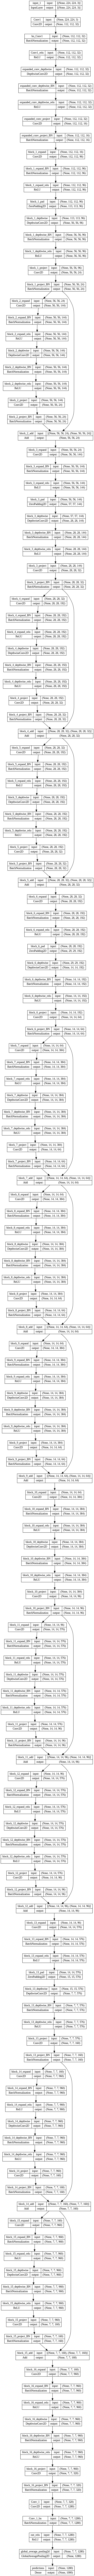

In [ ]:
keras.utils.plot_model(mobile_net,'MobiletV2.png',show_shapes=True)

In [ ]:
mobile_net.trainnable=False

In [ ]:
base_input = mobile_net.layers[0].input
base_output = mobile_net.layers[-2].output
Flatten = layers.Flatten()(base_output)
Dense1 = layers.Dense(units=256, activation="relu")(Flatten)
Dense2 = layers.Dense(units=64, activation="relu")(Dense1)
final_output = layers.Dense(1, activation='sigmoid')(Dense2)
New_model = keras.Model(inputs=base_input, outputs=final_output)


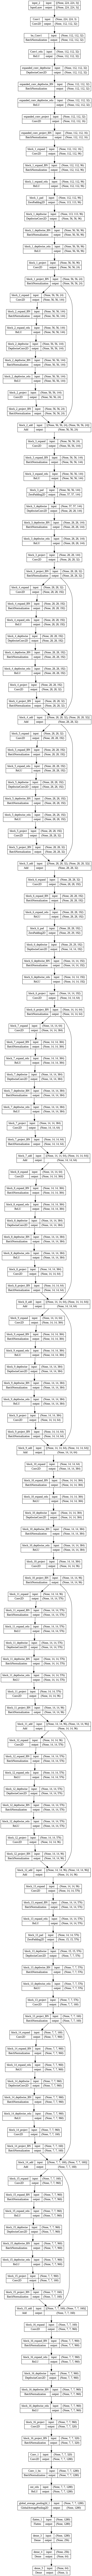

In [ ]:
keras.utils.plot_model(New_model,'New_MobiletV2.png',show_shapes=True)

In [ ]:
# save the model architecture
New_model.save (Working_dir+'mobile_net_before_compiling.h5')

##Compile the model

In [ ]:
#Model Compile with Adam
New_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'],
)


##Set earlystopping,csvlogger,checkpoint

In [ ]:
#earlystopping
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [ ]:
 #CSVlogger
log_csv=keras.callbacks.CSVLogger(Working_dir+'my log.csv', separator='.', append=False)

In [ ]:
#save callbacks
save_callback=keras.callbacks.ModelCheckpoint(
    filepath=Working_dir+'Checkpoint/',
    save_weights=True,
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_format='h5'
)

## Fit the model

In [ ]:
steps_per_epochs=round((train_generator.samples)/Batch_size)
validation_steps=round((validation_generator.samples)/Batch_size)
steps_per_epochs,validation_steps

(48, 12)

In [ ]:
#Using model.fit
history=New_model.fit(train_generator,
                        epochs=10,
                        steps_per_epoch=steps_per_epochs,
                        verbose=1,
                        validation_data=validation_generator,
                        validation_steps=validation_steps,
                        callbacks=[save_callback,early_stop,log_csv])

Epoch 1/10
 7/48 [===>..........................] - ETA: 5:09 - loss: 0.5445 - accuracy: 0.7500

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - ETA: 0s - loss: 0.1464 - accuracy: 0.9482

48/48 [==============================] - 639s 12s/step - loss: 0.1464 - accuracy: 0.9482 - val_loss: 0.7670 - val_accuracy: 0.7950
Epoch 2/10
 9/48 [====>.........................] - ETA: 44s - loss: 0.0103 - accuracy: 0.9965

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - ETA: 0s - loss: 0.0132 - accuracy: 0.9964

48/48 [==============================] - 85s 2s/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.2534 - val_accuracy: 0.9164
Epoch 3/10
11/48 [=====>........................] - ETA: 42s - loss: 0.0054 - accuracy: 0.9971

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9990

48/48 [==============================] - 86s 2s/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.0936 - val_accuracy: 0.9687
Epoch 4/10
13/48 [=======>......................] - ETA: 38s - loss: 0.0016 - accuracy: 1.0000

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - 64s 1s/step - loss: 0.0053 - accuracy: 0.9971 - val_loss: 0.2605 - val_accuracy: 0.9230
Epoch 5/10
48/48 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9987

48/48 [==============================] - 85s 2s/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.0793 - val_accuracy: 0.9765
Epoch 6/10
 1/48 [..............................] - ETA: 55s - loss: 8.2198e-04 - accuracy: 1.0000

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9997

48/48 [==============================] - 86s 2s/step - loss: 0.0016 - accuracy: 0.9997 - val_loss: 0.0139 - val_accuracy: 0.9974
Epoch 7/10
37/48 [======================>.......] - ETA: 12s - loss: 0.0023 - accuracy: 0.9987

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


48/48 [==============================] - 64s 1s/step - loss: 0.0032 - accuracy: 0.9984 - val_loss: 0.0152 - val_accuracy: 0.9961
Epoch 8/10
48/48 [==============================] - 64s 1s/step - loss: 0.0023 - accuracy: 0.9987 - val_loss: 0.0455 - val_accuracy: 0.9843
Epoch 9/10
48/48 [==============================] - 64s 1s/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 0.0208 - val_accuracy: 0.9948
Epoch 9: early stopping


In [ ]:
history.history

{'loss': [0.1463683545589447,
  0.013221736997365952,
  0.004466016311198473,
  0.005320934113115072,
  0.004260824527591467,
  0.0016150868032127619,
  0.003203494241461158,
  0.0023333928547799587,
  0.0011695101857185364],
 'accuracy': [0.948157787322998,
  0.9964134097099304,
  0.9990218281745911,
  0.997065544128418,
  0.9986957907676697,
  0.9996739625930786,
  0.9983697533607483,
  0.9986957907676697,
  0.9996739625930786],
 'val_loss': [0.7670460343360901,
  0.25340110063552856,
  0.09364569187164307,
  0.26048779487609863,
  0.07933736592531204,
  0.01387474499642849,
  0.015177660621702671,
  0.04554886370897293,
  0.020832348614931107],
 'val_accuracy': [0.795039176940918,
  0.9164490699768066,
  0.9686684012413025,
  0.9229764938354492,
  0.9765012860298157,
  0.997389018535614,
  0.9960835576057434,
  0.9843342304229736,
  0.9947780966758728]}

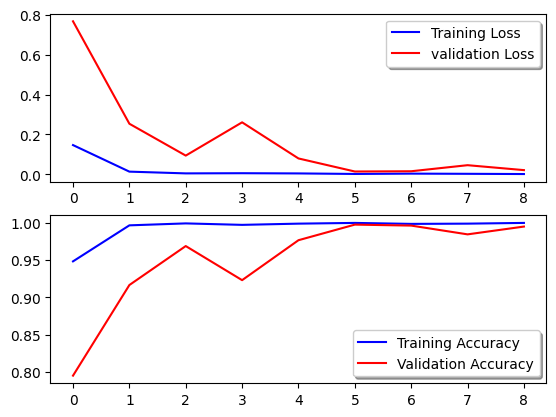

In [ ]:
# Show Loss and Accuracy Plots
fig, ax = plt.subplots(2, 1)

ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation Loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

From the provided training history, it seemed that the model was performing well on both the training and validation sets. The loss was decreasing with each epoch and the accuracy was increasing, which was a good indication that the model was learning the patterns in the data. The validation accuracy was also high, which meant that the model was generalizing well and not overfitting to the training data.

## Loaded the saved model architechure, re-compile and then load the saved training weight





In [ ]:
# load the saved model architecture 
original_model = keras.models.load_model(Working_dir+'mobile_net_before_compiling.h5')

# create a new model with the same architecture
Original_model = keras.Model(inputs=original_model.input, outputs=original_model.output)


In [ ]:
#Model Compile with Adam
Original_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy'],
)


In [ ]:
# load the saved model weights into the new model
Original_model.load_weights(Working_dir+'Checkpoint/')

In [ ]:
## Save the model
Original_model.save(Working_dir+'mask_detector_model.h5')

#Model testing on Image 

##Download  dataset using bing

In [ ]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bing_image_downloader import downloader
downloader.download('people wearing mask', limit=50,  output_dir=Working_dir+'Test_data/', 
adult_filter_off=True, force_replace=False, timeout=60)


[%] Downloading Images to /content/drive/MyDrive/Colab Notebooks/Mask detection/Test_data/people wearing mask


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://mediaproxy.salon.com/width/1200/https://media.salon.com/2020/09/people-wearing-masks-0908202.jpg
[Error]Invalid image, not saving https://mediaproxy.salon.com/width/1200/https://media.salon.com/2020/09/people-wearing-masks-0908202.jpg

[!] Issue getting: https://mediaproxy.salon.com/width/1200/https://media.salon.com/2020/09/people-wearing-masks-0908202.jpg
[!] Error:: Invalid image, not saving https://mediaproxy.salon.com/width/1200/https://media.salon.com/2020/09/people-wearing-masks-0908202.jpg

[%] Downloading Image #1 from https://www.onemedical.com/media/images/woman-wearing-mask.original.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.thewire.in/wp-content/uploads/2020/06/16171749/people-wearing-face-mask-for-protection-3957986-1600x1071.jpg
[%] File Down

##Prepare test dataset

In [ ]:
# Test data generator
test_datagen = ImageDataGenerator(
    rescale=1./255,
    data_format='channels_last',
    dtype='float32'
)

In [ ]:
test_generator=test_datagen.flow_from_directory(
  '/content/drive/MyDrive/Colab Notebooks/Mask detection/Test_data/',
  target_size=(img_height,img_width),
  batch_size=Batch_size,
  shuffle=True,
  class_mode='binary',
)

Found 100 images belonging to 1 classes.


##Evaluate model performance

In [ ]:
#Evaluate model
results=Original_model.evaluate(test_generator,verbose=2)
print("Test loss, Test acc:", results)

2/2 - 4s - loss: 0.6009 - accuracy: 0.9000 - 4s/epoch - 2s/step
Test loss, Test acc: [0.600853681564331, 0.8999999761581421]


The evaluation result indicates that the model has achieved a test accuracy of 90%. This means that the model is able to correctly classify 90% of the test images into their respective classes. The test loss is 0.60, which is also an indication of good performance as lower loss values indicate better model predictions. Overall, the evaluation result suggests that the model is performing well on the test set and is able to generalize to unseen data.

##Predict result

In [ ]:
x_test,y_test=test_generator.next()
#Claculated the prediction probabilities
Y_prediction=Original_model.predict(x_test)
print('Prediction value:',Y_prediction)
#Calculate the maximum value for probabilities 
Y_classes=[np.argmax(element) for element in Y_prediction]
print('Original label:',y_test)
print('Predicted label:',Y_classes)

2/2 [==============================] - 1s 472ms/step
Prediction value: [[8.61875887e-05]
 [5.18707520e-06]
 [2.56862460e-08]
 [3.36938014e-04]
 [9.53997187e-07]
 [1.89497096e-05]
 [1.36000919e-04]
 [2.56862460e-08]
 [4.10612984e-08]
 [3.61360253e-06]
 [5.20428375e-06]
 [1.00507925e-04]
 [9.99059379e-01]
 [2.18588028e-07]
 [5.12807783e-05]
 [9.07885333e-05]
 [1.12861060e-02]
 [1.85673412e-06]
 [1.51578221e-04]
 [6.78268261e-05]
 [7.43387558e-04]
 [5.35158455e-01]
 [5.86522992e-06]
 [2.22155268e-05]
 [1.03384573e-05]
 [1.89497096e-05]
 [1.46265229e-04]
 [2.43845552e-05]
 [1.49712861e-01]
 [9.99999046e-01]
 [9.42557017e-06]
 [1.35075552e-05]
 [2.38296525e-05]
 [1.39659414e-05]
 [1.74463985e-05]
 [6.76340205e-05]]
Original label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predicted label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#Define a prediction plot model
def prediction_plot(X,Y,predicted_label,index):
  X= X[index]
  Y=int(Y[index])
  label_title1=(classess[Y]+' , '+classess[predicted_label[index]])
  plt.xlabel(label_title1)                
  plt.imshow(X)

Enter your Image number [0-32]: 12


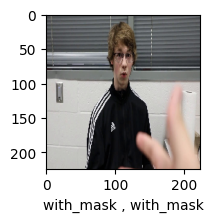

In [ ]:
#Check the single image result
Put_number = int(input("Enter your Image number [0-32]: "))
#print('Original Classes :',classes[(Y_test.reshape(-1,))[Put_number]])
#print('Predicted Classes: ',classes[Y_classes[Put_number]])
fig=plt.figure(figsize=(15,2)) 
prediction_plot(x_test,y_test,Y_classes,Put_number)
plt.show()

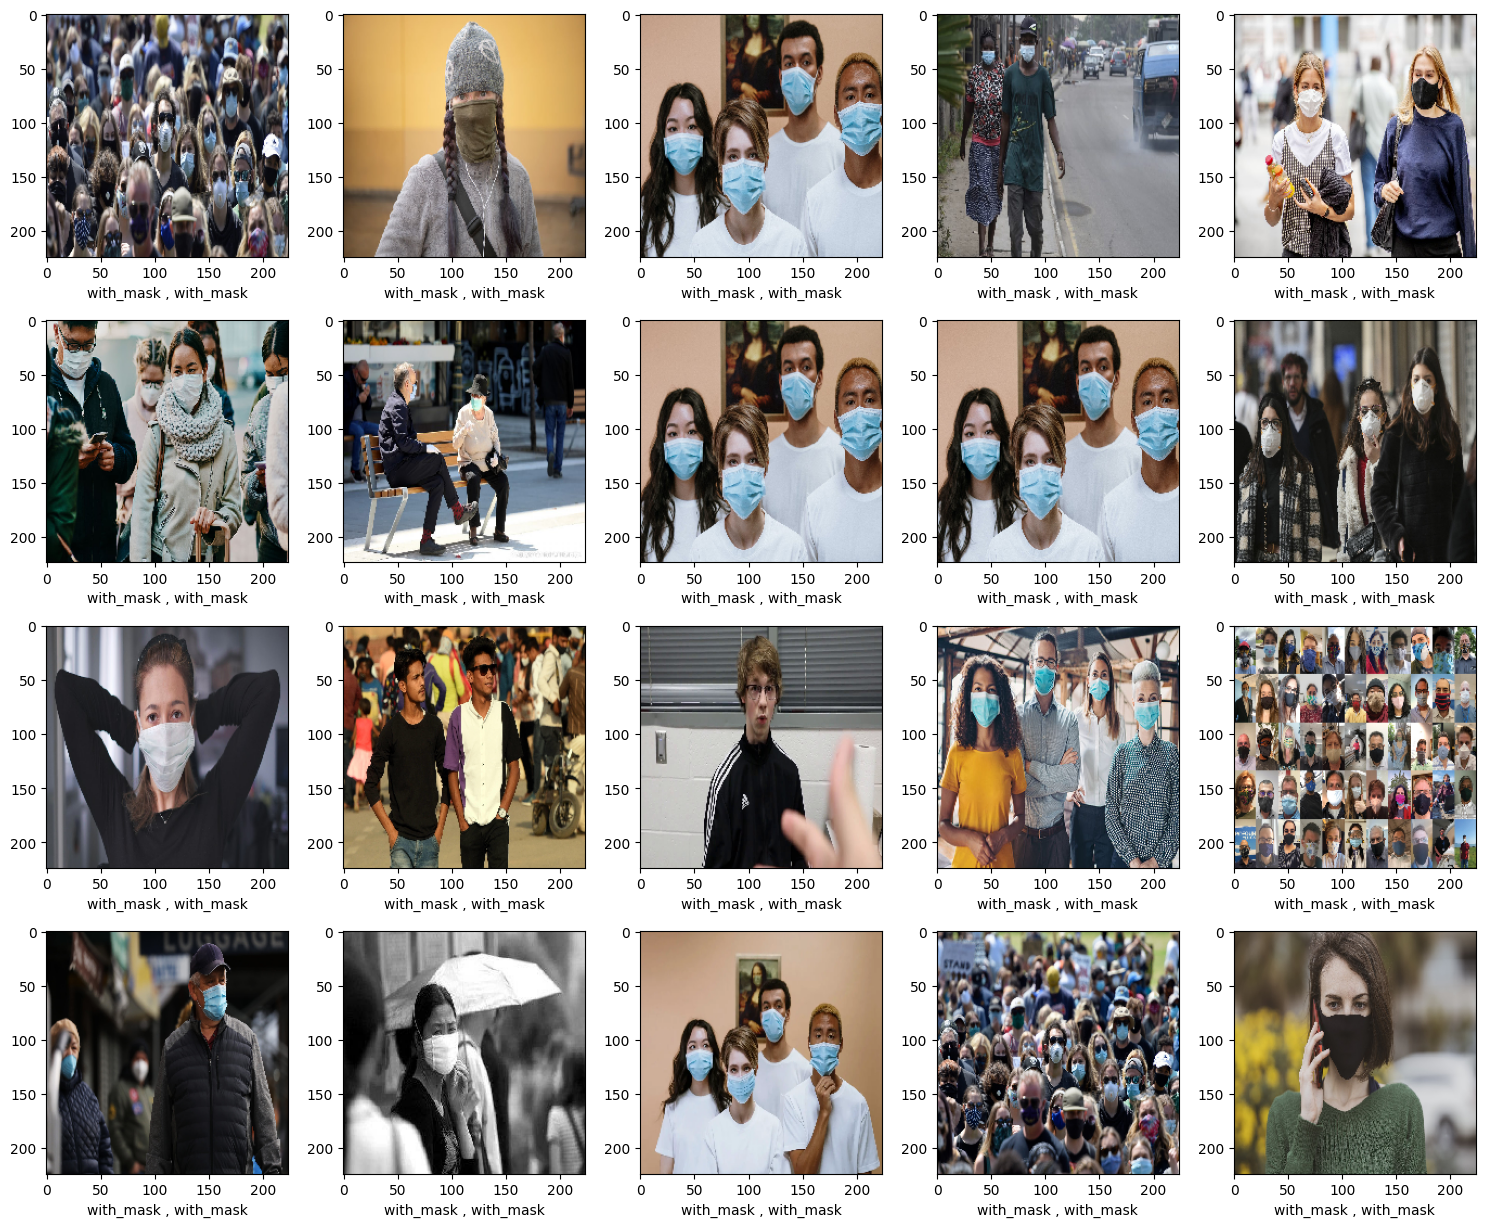

In [ ]:
#Visualize the 1st 25 test data label prediction
fig=plt.figure(figsize=(15,15)) 
axes=[] 
for index in range(20):
  axes.append( fig.add_subplot(5,5, index+1) )
  prediction_plot(x_test,y_test,Y_classes,index)
fig.tight_layout()    
plt.show()